<a href="https://colab.research.google.com/github/joaopdss/FacialExpressionRecognition/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Datasets/fer_dataset.zip -d /content/

A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: /content/dataset/surprise/image0012603.jpg  
 extracting: /content/dataset/surprise/image0012648.jpg  
 extracting: /content/dataset/surprise/image0012672.jpg  
 extracting: /content/dataset/surprise/image0012715.jpg  
 extracting: /content/dataset/surprise/image0012758.jpg  
 extracting: /content/dataset/surprise/image0012808.jpg  
 extracting: /content/dataset/surprise/image0012820.jpg  
 extracting: /content/dataset/surprise/image0012833.jpg  
 extracting: /content/dataset/surprise/image0012842.jpg  
 extracting: /content/dataset/surprise/image0012865.jpg  
 extracting: /content/dataset/surprise/image0012875.jpg  
 extracting: /content/dataset/surprise/image0012942.jpg  
 extracting: /content/dataset/surprise/image0012997.jpg  
 extracting: /content/dataset/surprise/image0013015.jpg  
 extracting: /content/dataset/surprise/image0013018.jpg  
 extracting: /content/dataset/surprise/image0013058.jpg  
 extracting: 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(directory="/content/dataset",
                                            color_mode="rgb",
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(48, 48),
                                            shuffle=True,
                                            seed=42,
                                            validation_split=0.2,
                                            subset="both")

Found 40476 files belonging to 5 classes.
Using 32381 files for training.
Using 8095 files for validation.


In [ ]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [ ]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

(75, 75, 3)
(75, 75, 3)


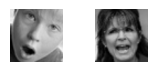

In [ ]:
for images, labels in train_data.take(1):
  for i in range(2):
    ax = plt.subplot(6, 6, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=4, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=50, callbacks=[reduce_lr, checkpoint_callback], validation_data=val_data)

Epoch 1/50
1012/1012 [==============================] - ETA: 0s - loss: 1.6735 - accuracy: 0.2420
Epoch 1: val_loss improved from inf to 1.67039, saving model to checkpoint/


1012/1012 [==============================] - 123s 104ms/step - loss: 1.6735 - accuracy: 0.2420 - val_loss: 1.6704 - val_accuracy: 0.2614 - lr: 0.0010
Epoch 2/50
1012/1012 [==============================] - ETA: 0s - loss: 1.5917 - accuracy: 0.2545
Epoch 2: val_loss improved from 1.67039 to 1.56423, saving model to checkpoint/


1012/1012 [==============================] - 107s 106ms/step - loss: 1.5917 - accuracy: 0.2545 - val_loss: 1.5642 - val_accuracy: 0.2723 - lr: 0.0010
Epoch 3/50
1012/1012 [==============================] - ETA: 0s - loss: 1.5576 - accuracy: 0.2841
Epoch 3: val_loss improved from 1.56423 to 1.45533, saving model to checkpoint/


1012/1012 [==============================] - 109s 107ms/step - loss: 1.5576 - accuracy: 0.2841 - val_loss: 1.4553 - val_accuracy: 0.3728 - lr: 0.0010
Epoch 4/50
1012/1012 [==============================] - ETA: 0s - loss: 1.4319 - accuracy: 0.3769
Epoch 4: val_loss did not improve from 1.45533
1012/1012 [==============================] - 104s 103ms/step - loss: 1.4319 - accuracy: 0.3769 - val_loss: 1.4863 - val_accuracy: 0.3727 - lr: 0.0010
Epoch 5/50
1012/1012 [==============================] - ETA: 0s - loss: 1.3269 - accuracy: 0.4373
Epoch 5: val_loss improved from 1.45533 to 1.22002, saving model to checkpoint/


1012/1012 [==============================] - 107s 105ms/step - loss: 1.3269 - accuracy: 0.4373 - val_loss: 1.2200 - val_accuracy: 0.4910 - lr: 0.0010
Epoch 6/50
1012/1012 [==============================] - ETA: 0s - loss: 1.2434 - accuracy: 0.4762
Epoch 6: val_loss improved from 1.22002 to 1.21185, saving model to checkpoint/


1012/1012 [==============================] - 102s 101ms/step - loss: 1.2434 - accuracy: 0.4762 - val_loss: 1.2119 - val_accuracy: 0.5036 - lr: 0.0010
Epoch 7/50
1012/1012 [==============================] - ETA: 0s - loss: 1.1804 - accuracy: 0.5096
Epoch 7: val_loss did not improve from 1.21185
1012/1012 [==============================] - 99s 98ms/step - loss: 1.1804 - accuracy: 0.5096 - val_loss: 1.2287 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 8/50
1012/1012 [==============================] - ETA: 0s - loss: 1.1317 - accuracy: 0.5281
Epoch 8: val_loss improved from 1.21185 to 1.01794, saving model to checkpoint/


1012/1012 [==============================] - 101s 99ms/step - loss: 1.1317 - accuracy: 0.5281 - val_loss: 1.0179 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 9/50
1012/1012 [==============================] - ETA: 0s - loss: 1.0899 - accuracy: 0.5518
Epoch 9: val_loss improved from 1.01794 to 0.96298, saving model to checkpoint/


1012/1012 [==============================] - 101s 99ms/step - loss: 1.0899 - accuracy: 0.5518 - val_loss: 0.9630 - val_accuracy: 0.6163 - lr: 0.0010
Epoch 10/50
1012/1012 [==============================] - ETA: 0s - loss: 1.0547 - accuracy: 0.5672
Epoch 10: val_loss improved from 0.96298 to 0.94377, saving model to checkpoint/


1012/1012 [==============================] - 102s 100ms/step - loss: 1.0547 - accuracy: 0.5672 - val_loss: 0.9438 - val_accuracy: 0.6236 - lr: 0.0010
Epoch 11/50
1012/1012 [==============================] - ETA: 0s - loss: 1.0316 - accuracy: 0.5808
Epoch 11: val_loss did not improve from 0.94377
1012/1012 [==============================] - 99s 98ms/step - loss: 1.0316 - accuracy: 0.5808 - val_loss: 1.0803 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 12/50
1012/1012 [==============================] - ETA: 0s - loss: 1.0050 - accuracy: 0.5953
Epoch 12: val_loss improved from 0.94377 to 0.88622, saving model to checkpoint/


1012/1012 [==============================] - 106s 105ms/step - loss: 1.0050 - accuracy: 0.5953 - val_loss: 0.8862 - val_accuracy: 0.6430 - lr: 0.0010
Epoch 13/50
1012/1012 [==============================] - ETA: 0s - loss: 0.9756 - accuracy: 0.6082
Epoch 13: val_loss improved from 0.88622 to 0.87844, saving model to checkpoint/


1012/1012 [==============================] - 102s 101ms/step - loss: 0.9756 - accuracy: 0.6082 - val_loss: 0.8784 - val_accuracy: 0.6561 - lr: 0.0010
Epoch 14/50
1012/1012 [==============================] - ETA: 0s - loss: 0.9657 - accuracy: 0.6116
Epoch 14: val_loss did not improve from 0.87844
1012/1012 [==============================] - 104s 103ms/step - loss: 0.9657 - accuracy: 0.6116 - val_loss: 0.9824 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 15/50
1012/1012 [==============================] - ETA: 0s - loss: 0.9421 - accuracy: 0.6215
Epoch 15: val_loss did not improve from 0.87844
1012/1012 [==============================] - 104s 103ms/step - loss: 0.9421 - accuracy: 0.6215 - val_loss: 0.8918 - val_accuracy: 0.6364 - lr: 0.0010
Epoch 16/50
1012/1012 [==============================] - ETA: 0s - loss: 0.9242 - accuracy: 0.6327
Epoch 16: val_loss improved from 0.87844 to 0.84386, saving model to checkpoint/


1012/1012 [==============================] - 103s 101ms/step - loss: 0.9242 - accuracy: 0.6327 - val_loss: 0.8439 - val_accuracy: 0.6644 - lr: 0.0010
Epoch 17/50
1012/1012 [==============================] - ETA: 0s - loss: 0.9031 - accuracy: 0.6403
Epoch 17: val_loss improved from 0.84386 to 0.82918, saving model to checkpoint/


1012/1012 [==============================] - 101s 99ms/step - loss: 0.9031 - accuracy: 0.6403 - val_loss: 0.8292 - val_accuracy: 0.6783 - lr: 0.0010
Epoch 18/50
1012/1012 [==============================] - ETA: 0s - loss: 0.8978 - accuracy: 0.6483
Epoch 18: val_loss did not improve from 0.82918
1012/1012 [==============================] - 104s 103ms/step - loss: 0.8978 - accuracy: 0.6483 - val_loss: 0.8592 - val_accuracy: 0.6608 - lr: 0.0010
Epoch 19/50
1012/1012 [==============================] - ETA: 0s - loss: 0.8778 - accuracy: 0.6538
Epoch 19: val_loss improved from 0.82918 to 0.82825, saving model to checkpoint/


1012/1012 [==============================] - 101s 100ms/step - loss: 0.8778 - accuracy: 0.6538 - val_loss: 0.8283 - val_accuracy: 0.6772 - lr: 0.0010
Epoch 20/50
1012/1012 [==============================] - ETA: 0s - loss: 0.8631 - accuracy: 0.6595
Epoch 20: val_loss improved from 0.82825 to 0.79848, saving model to checkpoint/


1012/1012 [==============================] - 104s 102ms/step - loss: 0.8631 - accuracy: 0.6595 - val_loss: 0.7985 - val_accuracy: 0.6859 - lr: 0.0010
Epoch 21/50
1012/1012 [==============================] - ETA: 0s - loss: 0.8525 - accuracy: 0.6625
Epoch 21: val_loss improved from 0.79848 to 0.79346, saving model to checkpoint/


1012/1012 [==============================] - 108s 107ms/step - loss: 0.8525 - accuracy: 0.6625 - val_loss: 0.7935 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 22/50
1012/1012 [==============================] - ETA: 0s - loss: 0.8415 - accuracy: 0.6707
Epoch 22: val_loss improved from 0.79346 to 0.78836, saving model to checkpoint/


1012/1012 [==============================] - 103s 102ms/step - loss: 0.8415 - accuracy: 0.6707 - val_loss: 0.7884 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 23/50
 832/1012 [=======================>......] - ETA: 16s - loss: 0.8264 - accuracy: 0.6786

In [ ]:
model_1.save("best_fer.h5")

In [ ]:
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten, SeparableConv2D, Input, BatchNormalization, GlobalAveragePooling2D
# from tensorflow.keras_vggface.vggface import VGGFace

input_shape = (75, 75, 3)

base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=input_shape)
base_model.trainable = True

for layer in base_model.layers[:-200]:
  layer.trainable = False


inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = Flatten()(x)
# x = Dropout(0.7)(x)
# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.7)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.7)(x)
x = Dense(128, activation='relu')(x)
# x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
# x = Dropout(0.6)(x)
x = tf.keras.layers.Dense(5)(x)
outputs = tf.keras.layers.Activation("softmax")(x)
model = tf.keras.Model(inputs, outputs)

# Compile model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.fit(train_data, epochs=12, validation_data=val_data)

Epoch 1/12
1012/1012 [==============================] - 83s 56ms/step - loss: 1.5459 - accuracy: 0.3003 - val_loss: 1.4573 - val_accuracy: 0.3486
Epoch 2/12
1012/1012 [==============================] - 53s 52ms/step - loss: 1.4250 - accuracy: 0.3812 - val_loss: 1.4197 - val_accuracy: 0.3904
Epoch 3/12
1012/1012 [==============================] - 54s 53ms/step - loss: 1.3847 - accuracy: 0.4026 - val_loss: 1.3803 - val_accuracy: 0.4022
Epoch 4/12
1012/1012 [==============================] - 53s 52ms/step - loss: 1.3411 - accuracy: 0.4248 - val_loss: 1.5258 - val_accuracy: 0.3817
Epoch 5/12
1012/1012 [==============================] - 53s 52ms/step - loss: 1.3217 - accuracy: 0.4334 - val_loss: 1.3543 - val_accuracy: 0.4303
Epoch 6/12
1012/1012 [==============================] - 53s 52ms/step - loss: 1.2899 - accuracy: 0.4540 - val_loss: 1.3456 - val_accuracy: 0.4272
Epoch 7/12
1012/1012 [==============================] - 53s 52ms/step - loss: 1.2535 - accuracy: 0.4762 - val_loss: 1.2793 -

KeyboardInterrupt: ignored